<a href="https://www.kaggle.com/code/wuttipats/covid19-tweet-text-sentiment-classification?scriptVersionId=124270484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

  <a id='back_to_top'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center; font-size:32px;  padding:6px;'><left>COVID19 - Tweet Text Sentiment Classification 🐦</left></h1>
 "Classifying Tweeter text sentiment"

 
**Created By**: Wuttipat S. <br>
**Created Date**: 2023-03-27 <br>
**Status**: <span style="color:#FFFFFF; background-color:#EF913E;  font-weight:bold; padding:2px">On-going</span>


#### Update: 
- Version 1
    - Testing scorce ~ 0.8

# Table of Content

### 1. [Introduction](#introduction)
- [Project Objective](#project_objective)
- [Dataset Description](#dataset_description)
- [About this directory](#about_this_directory) 

### 2. [Importing Datasets](#load_dataset) 
### 3. [Data Cleaning](#data_cleaning)
### 4. [Generate Wordcloud](#generate_wordcloud)
### 5. [Data Preprocessing](#data_preprocessing) 
### 6. [Assigned Features and Label](#assigned_features_and_label)
### 7. [Text Normalization Techniques](#text_normalization_techniques)
* [Tokenization](#tokenization)
* [Stemming](#stemming)
* [Lemmatization](#lemmatization)

### 8. [Vectorization](#vectorization)
* [Bags of Words](#bags_of_words)
* [TF-IDF](#tf_idf)

### 9. [Machine Learning](#machine_learning) 
* [Naive Bayes Classifier](#naive_bayes_classifier)
* [GridSearchCv](#gridsearchcv)

### 10. [Summary](#summary)


<a id='introduction'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'><left>Introduction</left></h1>

<br>

<a id='project_objective'></a>
## Project Objective
---
- The objective of this project is to build a classification model using NLP techniques to analyze Twitter text related to COVID-19. The aim is to classify tweets into one of three categories: *negative, neutral, or positive* sentiment.

- To achieve this, several machine learning models will be trained and evaluated to compare their performance in terms of accuracy, precision, recall, F1 score, and ROC AUC. The models will be trained on a dataset of pre-labeled tweets, and different NLP techniques will be explored, such as tokenization, stop-word removal, stemming, and vectorization.

- By comparing the performance of different models, the project aims to identify the best-performing model for this task, which can be used for sentiment analysis of COVID-19 related tweets in the future.

<a id='dataset_description'></a>
## Dataset Description
---
- This dataset created by [AMAN MIGLANI](https://www.kaggle.com/datatattle).
- The tweets have been pulled from Twitter and manual tagging has been done. 
- The names and usernames have been given codes to avoid any privacy concerns.

<a id='about_this_directory'></a>
## About this directory
---
- **This dataset contain 2 csv files**
    - Corona_NLP_test.csv
    - Corona_NLP_train.csv
- **Each dataset has 6 columns:**
    1. UserName
    1. ScreenName
    1. Location
    1. Tweet At
    1. Original Tweet
    1. Label


In [1]:
'''
Vertify what environment are running
'''
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    path='/kaggle/input'
else:
    path="{}".format(os.getcwd())

In [2]:
"""
import libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

<a id='importing_datasets'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center; padding:6px;'>Importing datasets</h1>

In [3]:
train = pd.read_csv(f"{path}/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding="latin-1")
test = pd.read_csv(f"{path}/covid-19-nlp-text-classification/Corona_NLP_test.csv", encoding="latin-1")

In [4]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
print(f"Train set have {train.shape[1]} columns, {train.shape[0]} rows")
print(f"Test set have {test.shape[1]} columns, {test.shape[0]} rows")


Train set have 6 columns, 41157 rows
Test set have 6 columns, 3798 rows


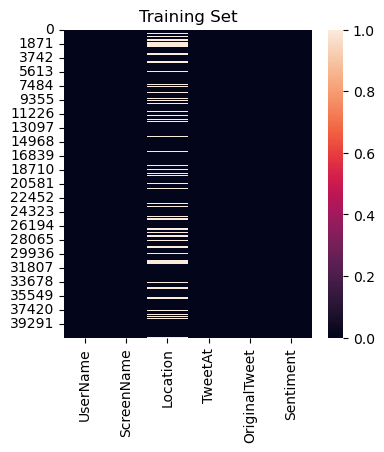

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64




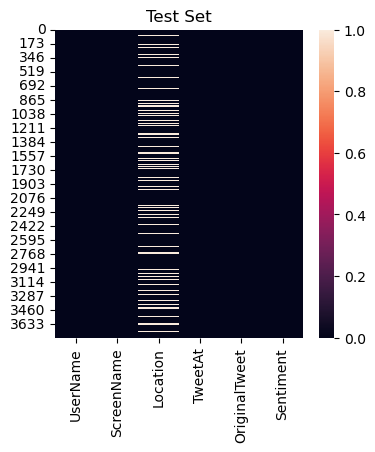

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


In [7]:
'''
Check for null values in data.
'''
plt.figure(figsize=(4,4))
sns.heatmap(train.isnull());
plt.title("Training Set")
plt.show()
print(train.isna().sum())

print()
print('='*100)
print()

plt.figure(figsize=(4,4))
sns.heatmap(test.isnull());
plt.title("Test Set")
plt.show()
print(test.isna().sum())

> ### *Location* column contains null values, since this column not being use for model's training. We can ignore it.

<a id='data_cleaning'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'>Data Cleaning</h1>

Overall, the function is cleaning the tweet text data by removing unnecessary information that may not be relevant for classification. This step is important to improve the performance of the classification models by reducing noise in the data.

<br>
<br>

This section takes a DataFrame as input and performs several data cleaning steps on it.
1. The column names are converted to lowercase
1. The "**originaltweet**" and "**sentiment**" columns are selected.
1. Then, regular expression functions are applied to the "originaltweet" column 
    - Following texts will be removed: 
        - web URLs
        - Twitter usernametags, hashtags
        - apostrophe
        - special characters
        - numbers. 
    - Finally, the "originaltweet" column is converted to lowercase.



In [8]:
import pandas as pd
import re

def cleaning(data):
    
    df = data.copy()
    
    # Convert column names to lowercase
    df.columns = map(str.lower, df.columns)
    
    # Select 'originaltweet' and 'sentiment' colunms
    df = df[['originaltweet', 'sentiment']]

    def remove_web_urls(text): return re.sub(r'https?://\S+', ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_web_urls)
    
    def remove_tags(text): return re.sub(r'@\w*', ' ' , text)
    df['originaltweet'] = df['originaltweet'].apply(remove_tags)
    
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    df['originaltweet'] = df['originaltweet'].apply(remove_hashtags)
    
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    df['originaltweet'] = df['originaltweet'].apply(remove_apostrophe)

    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_special_chars)
    
    def remove_number(text): return re.sub(r'[\d]', ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_number)
    
    # Convert the 'originaltweet' column to lowercase
    df['originaltweet'] = df['originaltweet'].str.lower()
    return df

# Apply function to dataframe
cleaned_train = cleaning(train)
cleaned_test = cleaning(test)

In [9]:
'''
Show transformed results by compare with an original.
'''

# Define how many example we want to show.
n_sample = 2

# Genareated a random iterger which represent an index of dataframe
samples = np.random.randint(0,len(cleaned_train['originaltweet'])-1,n_sample)

# Compare sentence of each index
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(train['OriginalTweet'][samples[i]])
    print("-"*150)
    print('CLEANED')
    print(cleaned_train['originaltweet'][samples[i]])
    print()
    print("="*150)
    print()


Sample# 1

ORIGINAL
@retired_rebel I go inside as my local #Farmboy and other grocery stores have done an amazing job of #SocialDistancing but itÂs only once a week and only one store. Today was the day. Before #Easter madness. https://t.co/EqENT1xJEU
------------------------------------------------------------------------------------------------------------------------------------------------------
CLEANED
  i go inside as my local   and other grocery stores have done an amazing job of   but it  s only once a week and only one store  today was the day  before   madness   


Sample# 2

ORIGINAL




#jungleroyalty apocalypseportraits #meme #virus #covid #covid19 #coronavirus #coronavirusmemes??? #looroll #toiletpaper #emporio #wig #queer #camp #whiteparty @ The Apocalypse https://t.co/kyrPolqh0f
------------------------------------------------------------------------------------------------------------------------------------------------------
CLEANED




  apocalypseportraits         

<a id='generate_wordcloud'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'>Generate Wordcloud</h1>

A word cloud is a graphical representation of text data, in which the most frequent words are displayed in larger font sizes and less frequent words in smaller font sizes. Word clouds are often used to give a quick overview of the most important or prominent terms within a large collection of text data.

To generate Wordcloud from tweet data, follow these steps:
1. Concatenate train and test data into one.
1. Extracts the text from the input series
1. Removes any stop words and generates a word cloud visualization.
1. Generates word clouds for each sentiment category separately (Extremely Negative, Negative, Neutral, Positive, Extremely Positive).


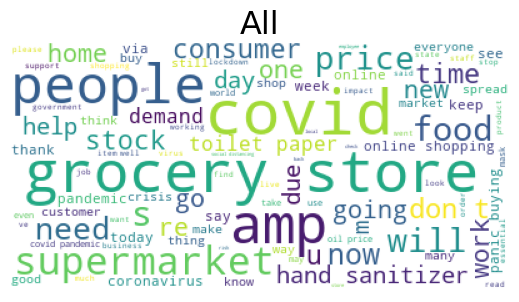

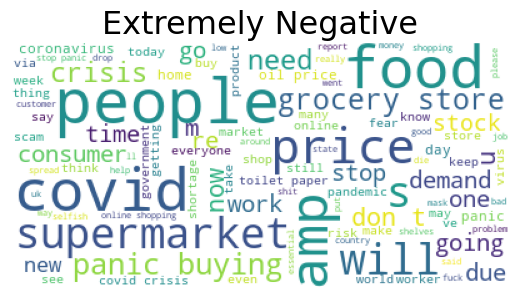

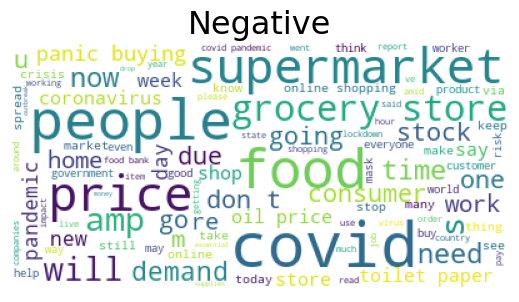

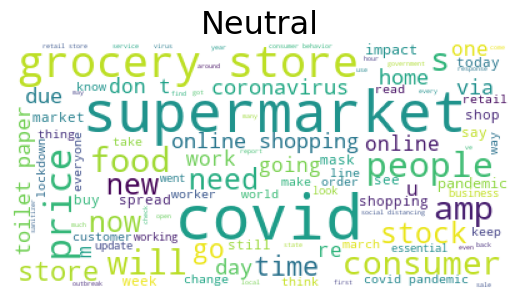

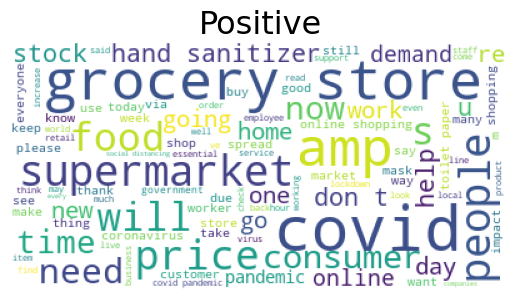

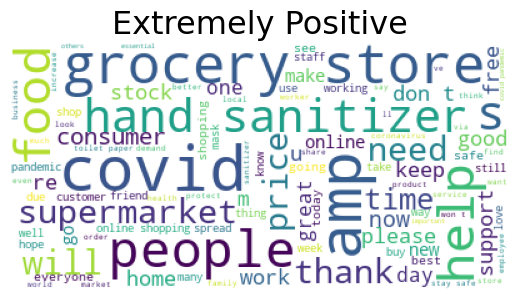

In [10]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(series, title=None):
    # Load the DataFrame and extract the "original_tweet" column
    text = series.values

    # Convert the text into a single string
    text = ' '.join(text)

    # Create a WordCloud object and generate the word cloud
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_words=100,
                          background_color ='white',
                          stopwords = stopwords,
                          max_font_size = 50).generate(text)

    # Display the word cloud
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=23)
    plt.show()

#################################################################

concat_df = pd.concat([cleaned_train, cleaned_test])
show_wordcloud(concat_df['originaltweet'], "All")
print()

sentiments = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
for sentiment in sentiments:
    _df = concat_df[concat_df['sentiment']==sentiment]['originaltweet']
    show_wordcloud(_df, sentiment)
    print()
    print()

<a id='data_preprocessing'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'>Data Preprocessing</h1>

#### Performs the following preprocessing steps:

- Change the original label names to new label names

|      Original      |  New label  |
|:------------------:|:--------:|
| Extremely Negative | negative |
| Negative           | negative |
| Neutral            | neutral  |
| Positive           | positive |
| Extremely Positive | positive |

- Change the new label names to integer values

| New label | Integer values |
|----------|----------:|
| negative | -1        |
| neutral  | 0         |
| positive | 1         |

In [11]:
'''
Preprocess
'''
def label_preprocessing(data):
    
    df = data.copy()
    
    # mapping label
    df['sentiment'] = df['sentiment'].replace({'Extremely Negative': 'negative',
                                                   'Negative': 'negative',
                                                   'Neutral': 'neutral',
                                                   'Positive': 'positive',
                                                   'Extremely Positive': 'positive'})
    
    df['sentiment'] = df['sentiment'].replace({'negative':-1 , 'neutral':0, 'positive':1})
                                                  
    return df

#####################################

# Apply function to dataframe
processed_train = label_preprocessing(cleaned_train)
processed_test = label_preprocessing(cleaned_test)


<a id='assigned_features_and_label'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'>Assigned features and label</h1>

In [12]:
X_train = processed_train[['originaltweet']]
y_train = processed_train.sentiment

X_test = processed_test[['originaltweet']]
y_test = processed_test.sentiment

<a id='text_normalization_techniques'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'>Text Normalization Techniques</h1>

#### Text normalization techniques aim to reduce the variability of words by converting them to their base or root form. The purpose is to simplify the analysis and increase the accuracy of text-based machine learning models by transforming words in the corpus to their original form.

#### Some popular text normalization techniques included in notebook:
- Tokenization
- Stemming
- Lemmatization


<a id='tokenization'></a>
# Tokenization
---
Tokenization is a fundamental technique in Natural Language Processing (NLP) that involves breaking up a piece of text into smaller, meaningful units called tokens. Tokens are essentially the building blocks of text, and they can be words, phrases, or even individual characters, depending on the specific task and context.

Here an example of text tokenization:

`"Hello there, how are you doing today?"`

output:
> `['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?']`

Tokenization is an essential preprocessing step in many NLP applications, such as text classification, sentiment analysis, and machine translation. It helps to simplify the text by breaking it down into smaller, more manageable units, making it easier for machine learning models to process and analyze. In addition, tokenization enables us to perform further processing steps such as **stemming, lemmatization**, and part-of-speech tagging, which can be used to extract more meaningful information from the text.


<a id='stemming'></a>
# Stemming
---
Stemming is a process in NLP that involves reducing a word to its base or root form. This is important in NLP because it helps to reduce the number of unique words in a text corpus and standardize words with the same meaning to a common base form. Such as:

| Word        | Stem    |
|-------------|---------|
| program     | program |
| programming | program |
| programer   | program |
| programs    | program |
| programmed  | program |

Making it easier for algorithms to identify patterns and relationships in the text data.



<a id='lemmatization'></a>
# Lemmatization
---
Lemmatization is the process of reducing a word to its base or dictionary form, known as a lemma. It involves identifying and removing the inflectional endings of words, such as '-s', '-ed', '-ing', and converting them to their base or dictionary form. 

| Word        | Lemma     |
|-------------|-----------|
| program     | program   |
| programming | program   |
| programer   | programer |
| programs    | program   |
| programmed  | program   |

This process is important in NLP because it helps to reduce the dimensionality of the data by grouping together different inflected forms of a word, which have the same meaning, into a single term. This, in turn, helps to improve the accuracy of the analysis and the performance of the models.

<br><br>
> ####  <u>Note</u> We can notice the main difference between **stemming** and **lemmatization** is that stemming usually involves the removal of the end of a word, while lemmatization involves considering the context of the word and its part of speech to derive its base or root form.

## Stemming

In [13]:
"""
Stemming
"""
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def stemming(data):
    
    # Define a function to stem a sentence
    def stem_sentence(sentence):

        # Initialize PorterStemmer
        stemmer = PorterStemmer()

        # Tokenize the sentence into words
        words = word_tokenize(sentence)

        # Stem each word and return the stemmed sentence
        return ' '.join([stemmer.stem(word) for word in words])
    
    df = data.copy()
    df['originaltweet'] = df['originaltweet'].apply(stem_sentence)
    return df
    

###################################

# Apply the function to the 'originaltweet' column
stemmed_X_train = stemming(X_train)
stemmed_X_test = stemming(X_test)
print('STEMMING COMPLETED')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
STEMMING COMPLETED


## Lemmatization

In [14]:
"""
Lemmatization
"""

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

'''
Initiate setup for nltk WordNetLemmatizer
'''
# Define a install path for nltk
if iskaggle:
    nltk_path='/kaggle/working'
else:
    nltk_path="{}".format(os.getcwd())

isnltk_installed = os.path.isdir(f'{nltk_path}/nltk_data/corpora/wordnet')

# Install relevent libraries to nltk path
if isnltk_installed:
    nltk.data.path.append(f'{nltk_path}/nltk_data')
else:
    # Make directort name 'nlrk_data' in current work directory '/kaggle/working/'
    !mkdir nltk_data

    # Download neccessaty package as .zip file ('corpora' directory are automatically created)
    nltk.download('wordnet', f"{nltk_path}/nltk_data")
    nltk.download('omw-1.4', f"{nltk_path}/nltk_data/")

    # Unzip .zip file in folder '/kaggle/working/nltk_data/corpora'
    !unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
    !unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora

    # Add custom location nltk file data path
    nltk.data.path.append(f'{nltk_path}/nltk_data')
    
#############################################################################################

"""
Lemmatize Steps
"""
# Initialize wordnet lemmatizer
lemma = WordNetLemmatizer()

def lemmatized(data):

    def lemma_sentence(sentence):
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        # Stem each word and return the stemmed sentence
        return ' '.join([lemma.lemmatize(word) for word in words])


    df = data.copy()
    df['originaltweet'] = df['originaltweet'].apply(lemma_sentence)
    return df

################################################################


# Apply the function to the 'originaltweet' column
lemmatized_X_train = lemmatized(X_train)
lemmatized_X_test = lemmatized(X_test)

print("lemmeatized completed")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/co

In [15]:
'''
Comparing stemming, lemmatization and original.
'''

n_sample = 1
samples = np.random.randint(0,len(lemmatized_X_train['originaltweet'])-1,n_sample)
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(X_train['originaltweet'][samples[i]])
    print("-"*150)
    print('STEMMED')
    print(stemmed_X_train['originaltweet'][samples[i]])
    print("-"*150)
    print('LEMMATIZED')
    print(lemmatized_X_train['originaltweet'][samples[i]])
    print()
    print("="*150)
    print()

Sample# 1

ORIGINAL
grocery store apologizes for price hike amid the covid    pandemic     
------------------------------------------------------------------------------------------------------------------------------------------------------
STEMMED
groceri store apolog for price hike amid the covid pandem
------------------------------------------------------------------------------------------------------------------------------------------------------
LEMMATIZED
grocery store apologizes for price hike amid the covid pandemic




# Word Counts

In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

class Wordcounts:
    
    def __init__(self, series):
        
        print(f"\n>>>> init Wordcounts...\n")
        # Combine all comments into a single string
        text = ' '.join(series.tolist())
        
        # Define stopwords
        stop_words = set(stopwords.words('english'))
        
        # Remove stopwords
        self.text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
        
        # Count the frequency of each word using the Counter class
        self.word_counts = Counter(self.text.split())
        
    def count_words(self):
        return len(self.word_counts)

    def plot_top_words(self, n):
        
        # Get the top n most frequent words in descending order
        top_words = self.word_counts.most_common(n)[::-1]

        # Create a horizontal bar plot of the top 10 most frequent words
        plt.barh(range(len(top_words)), [count for word, count in top_words])
        plt.yticks(range(len(top_words)), [word for word, count in top_words])
        plt.title('Top 10 most frequent words (excluding stopwords)')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()



stem_word_counts = Wordcounts(stemmed_X_train['originaltweet'])
print("Total Stemming Wordcounts: {}".format(stem_word_counts.count_words()))

lemm_word_counts = Wordcounts(lemmatized_X_train['originaltweet'])
print("Total Lemmatized Wordcounts: {}".format(lemm_word_counts.count_words()))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

>>>> init Wordcounts...

Total Stemming Wordcounts: 22475

>>>> init Wordcounts...

Total Lemmatized Wordcounts: 28699


> #### <u>Note</u> 
> We noticed. Based on the given output, we can observe that the total **word count after lemmatization is higher than the total word count after stemming**. This is because stemming only removes the suffixes from the words to reduce them to their root form, whereas lemmatization considers the context and meaning of the word to reduce it to its base form.
> 
> In other words, stemming can sometimes result in words that are not actual words or are not meaningful, whereas lemmatization always results in a valid word in the language. Therefore, lemmatization can potentially result in more accurate and meaningful results in NLP tasks. However, it is also computationally more expensive than stemming.

<a id='vectorization'></a>
<h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'><left>Vectorization</left></h1>
 
In natural language processing, machine learning models work with numerical data as input. However, textual data is typically in the form of words or sentences. Therefore, we need to convert text data into a numerical representation that can be used as input to machine learning models. This process is called **vectorization**.

Vectorization converting text into a numerical representation that can be used as input to machine learning models. This is typically done using techniques such as **bag-of-words** or **TF-IDF**

<a id='bags_of_words'></a>
# Bags of words
In this technique, each unique word in a text document is counted and then represented as a vector. These vectors can be used to compare the similarity between different documents, perform clustering, or classify documents based on their content.

For example, consider the following two sentences:
1. This is the first document.
1. This document is the second document.
1. And this is the third one.
1. Is this the first document?



|                                       | and | document | first | is | one | second | the | third | this |
|---------------------------------------|-----|----------|-------|----|-----|--------|-----|-------|------|
| This is the first document.           | 0   | 1        | 1     | 1  | 0   | 0      | 1   | 0     | 1    |
| This document is the second document. | 0   | 2        | 0     | 1  | 0   | 1      | 1   | 0     | 1    |
| And this is the third one.            | 1   | 0        | 0     | 1  | 1   | 0      | 1   | 1     | 1    |
| Is this the first document?           | 0   | 1        | 1     | 1  | 0   | 0      | 1   | 0     | 1    |

The output will be:
Feature names (vocabulary): <br>
> `['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']`

Matrix : <br>
> `[
>   [0,1,1,1,0,0,1,0,1],
>   [0,2,0,1,0,1,1,0,1],
>   [1,0,0,1,1,0,1,1,1],
>   [0,1,1,1,0,0,1,0,1]
>  ]`

<br><br>
> <p style='color:red; text-align:left; font-size:18px;'><u>Note</u>:</p>
> <p style='color:red; text-align:left; font-size:18px;'>The <strong>Bags-of-words</strong> vectorizer generates counts that are not normalized, resulting in an exaggeration of the importance of each word. This can lead to poor performance of the classification model, as observed in the case of Gradient-Boosting-Classifier where the algorithm did not converge.
> </p>
> 
> <p style='color:blue; text-align:left; font-size:18px;'>To address this issue, alternative vectorization methods such as <strong>TF-IDF</strong> can be used, which normalize the word counts to improve the accuracy of the model. </p>



In [17]:
"""
Bags-of-words Vectorizer
"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

count_vectorizer = CountVectorizer(stop_words='english')

count_X_train = count_vectorizer.fit_transform(lemmatized_X_train.originaltweet)
count_X_test = count_vectorizer.transform(lemmatized_X_test.originaltweet)

print(count_vectorizer.get_feature_names_out()[:10])
count_X_train.A[:2]


['aa' 'aaa' 'aaaaas' 'aaaand' 'aaannnddd' 'aabutan' 'aahh' 'aajeevika'
 'aalto' 'aamen']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<a id='tf_idf'></a>
# TF-IDF
**TF-IDF (Term Frequency-Inverse Document Frequency)** is a matrix that represents the importance of each word in each document in the corpus. The values in the matrix are computed using the TF-IDF formula, which takes into account both the term frequency (TF) and the inverse document frequency (IDF) of each word. The feature names (vocabulary) are the same as in the bag-of-words example, but the values in the matrix are different.

<figure style="text-align:center;">
    <img src="http://3.bp.blogspot.com/-u928a3xbrsw/UukmRVX_JzI/AAAAAAAAAKE/wIhuNmdQb7E/s1600/td-idf-graphic.png" alt="Alt text" width="600">
    <figcaption>images from: http://filotechnologia.blogspot.com/2014/01/a-simple-java-class-for-tfidf-scoring.html</figcaption>
</figure>

<br>
<br>

The TF-IDF matrix, the value of each word is calculated by multiplying its term frequency (TF) with its inverse document frequency (IDF). The TF represents how frequently a word occurs in a document, while the IDF represents how important the word is in the corpus.





|                                       |  and | document | first |   is |  one | second |  the | third | this |
|--------------------------------------:|-----:|---------:|------:|-----:|-----:|-------:|-----:|------:|-----:|
|           This is the first document. | 0 |     0.38 |  0.38 | 0.27 | 0 |    0 | 0.27 |  0 | 0.27 |
| This document is the second document. | 0 |     0.50 |  0 | 0.25 | 0 |    0.5 | 0.25 |  0 | 0.25 |
|            And this is the third one. | 0.41 |     0 |  0 | 0.29 | 0.41 |    0 | 0.29 |  0.41 | 0.29 |
|           Is this the first document? | 0 |     0.38 |  0.38 | 0.27 | 0 |    0 | 0.27 |  0 | 0.27 |

The output will be:
Feature names (vocabulary): <br>
> `['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']`

Matrix : <br>
> `[
>  [0, 0.38, 0.38, 0.27, 0, 0, 0.27, 0.0, 0.27],
>  [0, 0.5, 0, 0.25, 0, 0.5, 0.25, 0, 0.25],
>  [0.41, 0, 0.0, 0.29, 0.41, 0, 0.29, 0.41, 0.29],
>  [0, 0.38, 0.38, 0.27, 0.0, 0, 0.27, 0, 0.27]
>  ] `



In [18]:
"""
Tf-IDf Vectorizer
"""
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_X_train = tfidf_vectorizer.fit_transform(lemmatized_X_train.originaltweet)
tfidf_X_test = tfidf_vectorizer.transform(lemmatized_X_test.originaltweet)

print(tfidf_vectorizer.get_feature_names_out()[:10])
print(tfidf_X_train.A[:2])

['aa' 'aaa' 'aaaaas' 'aaaand' 'aaannnddd' 'aabutan' 'aahh' 'aajeevika'
 'aalto' 'aamen']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


 <a id='machine_learning'></a>
 <h1 style='background:#1DA1F2; border:1; color:#F0FFFF; text-align:center;  padding:6px;'><left>Machine Learning</left></h1>


<a id='naive_bayes_classifier'></a>
# Naive Bayes Classifier
Since Naive Bayes classifiers are known for their simplicity and efficiency, making them a popular choice for text classification tasks. They are based on Bayes' theorem and assume that the presence of a particular feature in a class is independent of the presence of other features, which makes the model computationally efficient and easy to implement.

### Let start with Naive Bayes Classifier

In [19]:
'''
Simple Naive Bayes classifier function
'''

from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

def train_nb_model(X_train, y_train, X_test, y_test):
    nb_classifier = MultinomialNB()

    nb_classifier.fit(X_train, y_train)

    pred = nb_classifier.predict(X_test)

    score = metrics.accuracy_score(y_test, pred)

    print("Score: ",score)
    print()
    
    return pred
    

In [20]:
'''
Plot the confusion matrix function
'''
def plot_cm(y_true, y_pred):
    # Plot the confusion matrix
    # create a DataFrame from y_true and y_pred
    df = pd.DataFrame({'y_true': y_test, 'y_pred': pred})

    # create cross-tabulation matrix
    ctab = pd.crosstab(df['y_true'], df['y_pred'])
    
    # Reorder the index and columns
    new_order = [-1,0,1]
    ctab = ctab.reindex(index=new_order, columns=new_order)
    
    # Define classfication labels
    labels = ['negative', 'neutral','positive']

    cm = metrics.confusion_matrix(y_test, pred, labels=[-1,0,1])
    
    plt.figure(figsize=(3,3))
    sns.heatmap(ctab, annot=True, cmap='Blues', fmt='d',xticklabels=labels, yticklabels=labels, cbar=False)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.show()

Score:  0.6761453396524486



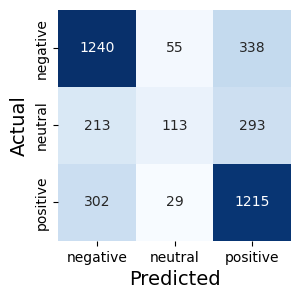

In [21]:
pred = train_nb_model(X_train = count_X_train,
             y_train = y_train,
             X_test = count_X_test,
             y_test = y_test)
plot_cm(y_test, pred)

<a id='gridsearchcv'></a>
# GridSearchCV
GridSearchCV is a function in the Scikit-learn library that performs an exhaustive search over specified hyperparameter values for a machine learning model. It works by taking a set of hyperparameters as input and trying out all possible combinations of hyperparameter values to determine which combination yields the best model performance. GridSearchCV uses cross-validation to evaluate each combination of hyperparameters, and returns the best set of hyperparameters that maximize the performance metric specified.

In this case, the models being tuned are :
- Multinomial Naive Bayes
- Linear Support Vector Classifier (SVC)
- Logistic Regression
- K-Nearest Neighbors Classifier
- Gradient Boosting Classifier
- Random Forest Classifier.

<br><br>
In this experiment I decided to following these steps:
1. Using **Stemming**
1. Then apply TF-IDF vectorizer
1. Using GridSearchCV with the specified hyperparameters. Store the best estimator and its accuracy score
1. Create a pandas dataframe to store the results of GridSearchCV
1. Preprocess the data using lemmatization technique
1. Repeat step 2-4 with the **lemmatized** data
1. Concatenate the results dataframes from the two preprocessing techniques into one dataframe to easily compare the accuracy scores of each model.

Let see which model is the best..


In [22]:
'''
GridsearchCV 
'''

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

def run_grid(X_train, X_test, y_train, y_test):
    
    # Define the models and hyperparameters
    models = {
        'MultinomialNB': (MultinomialNB(), {'alpha': [0.1, 1.0, 10.0],
                                            'fit_prior': [True, False]}),   
        'LinearSVC': (LinearSVC(), {'C': [0.1, 1.0, 10.0]}),
        'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0],
                                                      'penalty': ['l1', 'l2'],
                                                      'solver': ['liblinear', 'newton-cg', 'sag']}),
        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
        'GradientBoostingClassifier': (GradientBoostingClassifier(), {'n_estimators': [10, 50,100],
                                                                      'n_iter_no_change': [50]}),
        'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [10, 50,100]}),
    }



    # Define result list that will be used to store the results for each model.
    results_list = []
    
    # Iterate GridSearchCV to each model and print the best score and parameters
    for classifier_name, (model, params) in models.items():
        
        # creates a GridSearchCV object for the current model
        grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
        
        # Records the starting time for the grid search
        start_time = time.time()
        
        print(f'Running GridSearchCV for {classifier_name}.....')
        
        # Fits the GridSearchCV object on the training data
        grid.fit(X_train, y_train)
        
        # Predicts labels on the test data using the best hyperparameters
        pred = grid.predict(X_test)

        # Calculates the accuracy score on the test data.
        acc_score = accuracy_score(y_test, pred)
        
        # Records the ending time for the grid search
        end_time = time.time()
        
        # Calculates the total running time for the grid search
        running_time = end_time-start_time

        # Print the best hyperparameters and the best score
        print(f"Best Hyperparameters for {classifier_name}: {grid.best_params_}")
        print(f"Best Validate Score for {classifier_name}: {grid.best_score_:.3f}")
        print(f"Accuracy Testing score for {classifier_name}: {acc_score:.3f}")
        print(f"Running Time for {classifier_name}: {running_time:.3f} seconds")
        
        # Plot confusion matrix from best parameter
        plot_cm(y_test, pred)
        print('='*40)
        print()
        print()
        
        # Appends a list of results for the current model
        results_list.append([classifier_name, grid.best_params_, grid.best_score_, acc_score, running_time])
    
    # Create a dataframe form result list
    df=pd.DataFrame(results_list, columns=['classifier_name', 'best_params', 'best_val_score','test_score', 'running_time'])
    return df
        
        


In [23]:
'''
Highligh the max and min value in a column pandas
'''
def highlighter(df):
    df_styled = df.style.highlight_max(subset=['best_val_score','test_score'], color = 'lightgreen')
    df_styled = df_styled.highlight_min(subset=['best_val_score','test_score'], color = 'pink')
    df_styled = df_styled.highlight_max(subset=['running_time'], color = 'pink')
    df_styled = df_styled.highlight_min(subset=['running_time'], color = 'lightgreen')
    return df_styled

# Train Model

In [24]:
"""
Define model input
"""
X_train = processed_train[['originaltweet']]
y_train = processed_train.sentiment

X_test = processed_test[['originaltweet']]
y_test = processed_test.sentiment

### #1 Experiment

Running GridSearchCV for MultinomialNB.....
Best Hyperparameters for MultinomialNB: {'alpha': 1.0, 'fit_prior': False}
Best Validate Score for MultinomialNB: 0.678
Accuracy Testing score for MultinomialNB: 0.682
Running Time for MultinomialNB: 2.296 seconds


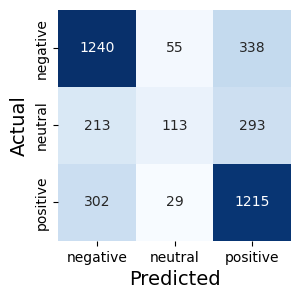



Running GridSearchCV for LinearSVC.....
Best Hyperparameters for LinearSVC: {'C': 1.0}
Best Validate Score for LinearSVC: 0.805
Accuracy Testing score for LinearSVC: 0.810
Running Time for LinearSVC: 20.210 seconds


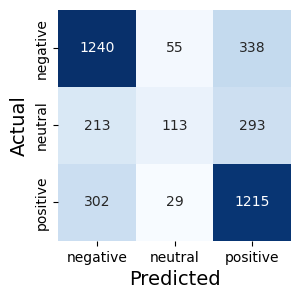



Running GridSearchCV for LogisticRegression.....
Best Hyperparameters for LogisticRegression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Validate Score for LogisticRegression: 0.831
Accuracy Testing score for LogisticRegression: 0.831
Running Time for LogisticRegression: 33.296 seconds


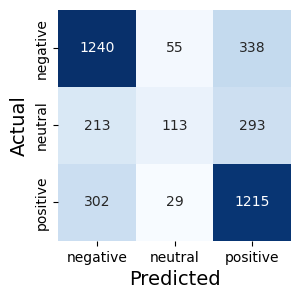



Running GridSearchCV for KNeighborsClassifier.....
Best Hyperparameters for KNeighborsClassifier: {'n_neighbors': 3}
Best Validate Score for KNeighborsClassifier: 0.217
Accuracy Testing score for KNeighborsClassifier: 0.182
Running Time for KNeighborsClassifier: 60.950 seconds


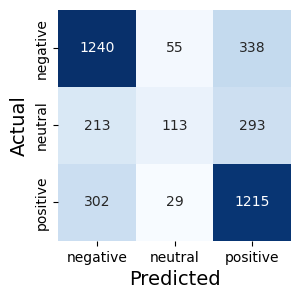



Running GridSearchCV for GradientBoostingClassifier.....
Best Hyperparameters for GradientBoostingClassifier: {'n_estimators': 100, 'n_iter_no_change': 50}
Best Validate Score for GradientBoostingClassifier: 0.660
Accuracy Testing score for GradientBoostingClassifier: 0.659
Running Time for GradientBoostingClassifier: 821.864 seconds


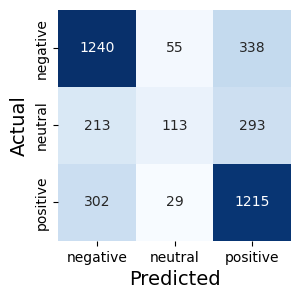



Running GridSearchCV for RandomForestClassifier.....
Best Hyperparameters for RandomForestClassifier: {'n_estimators': 100}
Best Validate Score for RandomForestClassifier: 0.745
Accuracy Testing score for RandomForestClassifier: 0.729
Running Time for RandomForestClassifier: 474.415 seconds


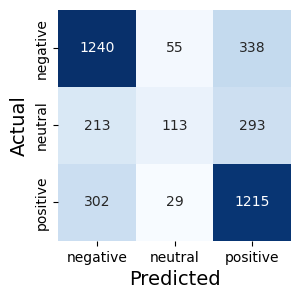

,classifier_name,best_params,best_val_score,test_score,running_time
0,MultinomialNB,"{'alpha': 1.0, 'fit_prior': False}",0.678013,0.681938,2.295689
1,LinearSVC,{'C': 1.0},0.805112,0.810427,20.209939
2,LogisticRegression,"{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}",0.831062,0.831227,33.295501
3,KNeighborsClassifier,{'n_neighbors': 3},0.217217,0.182464,60.949711
4,GradientBoostingClassifier,"{'n_estimators': 100, 'n_iter_no_change': 50}",0.659912,0.659294,821.864475
5,RandomForestClassifier,{'n_estimators': 100},0.745098,0.728541,474.415215


In [25]:
stemmed_X_train = stemming(X_train)
stemmed_X_test = stemming(X_test)

tfidf_X_train = tfidf_vectorizer.fit_transform(stemmed_X_train.originaltweet)
tfidf_X_test = tfidf_vectorizer.transform(stemmed_X_test.originaltweet)

stemmed_tfidf_df = run_grid(tfidf_X_train, tfidf_X_test, y_train, y_test)

highlighted_df = highlighter(stemmed_tfidf_df)
highlighted_df

### #2 Experiment

Running GridSearchCV for MultinomialNB.....
Best Hyperparameters for MultinomialNB: {'alpha': 1.0, 'fit_prior': False}
Best Validate Score for MultinomialNB: 0.680
Accuracy Testing score for MultinomialNB: 0.676
Running Time for MultinomialNB: 0.431 seconds


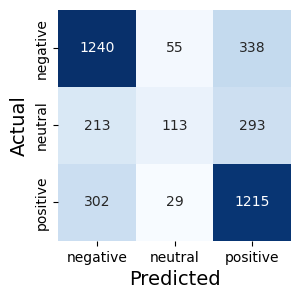



Running GridSearchCV for LinearSVC.....
Best Hyperparameters for LinearSVC: {'C': 1.0}
Best Validate Score for LinearSVC: 0.809
Accuracy Testing score for LinearSVC: 0.808
Running Time for LinearSVC: 19.620 seconds


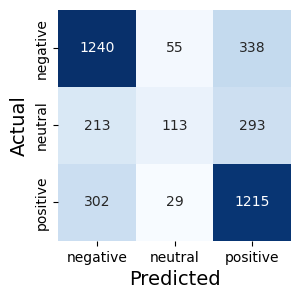



Running GridSearchCV for LogisticRegression.....
Best Hyperparameters for LogisticRegression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Validate Score for LogisticRegression: 0.829
Accuracy Testing score for LogisticRegression: 0.823
Running Time for LogisticRegression: 35.148 seconds


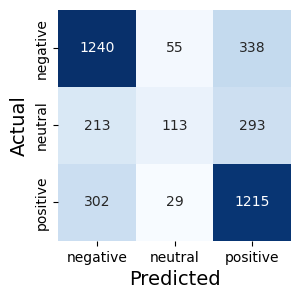



Running GridSearchCV for KNeighborsClassifier.....
Best Hyperparameters for KNeighborsClassifier: {'n_neighbors': 3}
Best Validate Score for KNeighborsClassifier: 0.215
Accuracy Testing score for KNeighborsClassifier: 0.179
Running Time for KNeighborsClassifier: 60.342 seconds


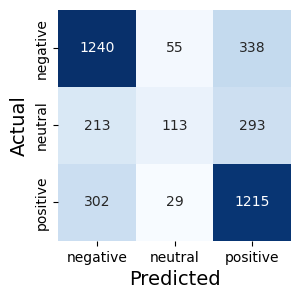



Running GridSearchCV for GradientBoostingClassifier.....
Best Hyperparameters for GradientBoostingClassifier: {'n_estimators': 100, 'n_iter_no_change': 50}
Best Validate Score for GradientBoostingClassifier: 0.641
Accuracy Testing score for GradientBoostingClassifier: 0.636
Running Time for GradientBoostingClassifier: 965.931 seconds


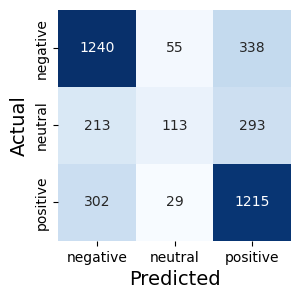



Running GridSearchCV for RandomForestClassifier.....
Best Hyperparameters for RandomForestClassifier: {'n_estimators': 100}
Best Validate Score for RandomForestClassifier: 0.736
Accuracy Testing score for RandomForestClassifier: 0.726
Running Time for RandomForestClassifier: 552.578 seconds


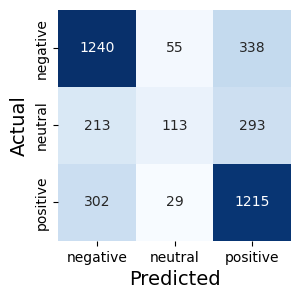

,classifier_name,best_params,best_val_score,test_score,running_time
0,MultinomialNB,"{'alpha': 1.0, 'fit_prior': False}",0.680346,0.676409,0.430545
1,LinearSVC,{'C': 1.0},0.809048,0.808057,19.619642
2,LogisticRegression,"{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}",0.828899,0.822538,35.148358
3,KNeighborsClassifier,{'n_neighbors': 3},0.214909,0.179042,60.341759
4,GradientBoostingClassifier,"{'n_estimators': 100, 'n_iter_no_change': 50}",0.640936,0.635598,965.931458
5,RandomForestClassifier,{'n_estimators': 100},0.736278,0.726172,552.577599


In [26]:
lemmatized_X_train = lemmatized(X_train)
lemmatized_X_test = lemmatized(X_test)


tfidf_X_train = tfidf_vectorizer.fit_transform(lemmatized_X_train.originaltweet)
tfidf_X_test = tfidf_vectorizer.transform(lemmatized_X_test.originaltweet)

lemma_tfidf_df = run_grid(tfidf_X_train, tfidf_X_test, y_train, y_test)

highlighted_df = highlighter(lemma_tfidf_df)
highlighted_df

### Final results

In [27]:
'''
Compare each models performance
'''
df1 = stemmed_tfidf_df.copy()
df2 = lemma_tfidf_df.copy()

df1['text_normalize'] = "stemming"
df2['text_normalize'] = "lemmatization"

concat_df = pd.concat([df1, df2])
concat_df = concat_df[['text_normalize', 'classifier_name', 'best_params', 'best_val_score', 'test_score', 'running_time']]
concat_df.reset_index(inplace=True, drop=True)
highlighted_df = highlighter(concat_df)
highlighted_df

,text_normalize,classifier_name,best_params,best_val_score,test_score,running_time
0,stemming,MultinomialNB,"{'alpha': 1.0, 'fit_prior': False}",0.678013,0.681938,2.295689
1,stemming,LinearSVC,{'C': 1.0},0.805112,0.810427,20.209939
2,stemming,LogisticRegression,"{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}",0.831062,0.831227,33.295501
3,stemming,KNeighborsClassifier,{'n_neighbors': 3},0.217217,0.182464,60.949711
4,stemming,GradientBoostingClassifier,"{'n_estimators': 100, 'n_iter_no_change': 50}",0.659912,0.659294,821.864475
5,stemming,RandomForestClassifier,{'n_estimators': 100},0.745098,0.728541,474.415215
6,lemmatization,MultinomialNB,"{'alpha': 1.0, 'fit_prior': False}",0.680346,0.676409,0.430545
7,lemmatization,LinearSVC,{'C': 1.0},0.809048,0.808057,19.619642
8,lemmatization,LogisticRegression,"{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}",0.828899,0.822538,35.148358
9,lemmatization,KNeighborsClassifier,{'n_neighbors': 3},0.214909,0.179042,60.341759


In [28]:
'''
Compare Stemming vs Lemmatization on model test score
'''
merge_df = df1.merge(df2, left_on='classifier_name', right_on='classifier_name', suffixes=['_stem', '_lemma'])
merge_df = merge_df[['classifier_name', 'test_score_stem', 'test_score_lemma']]
merge_df.style.highlight_max(subset=['test_score_stem','test_score_lemma'], color='lightgreen', axis=1)

,classifier_name,test_score_stem,test_score_lemma
0,MultinomialNB,0.681938,0.676409
1,LinearSVC,0.810427,0.808057
2,LogisticRegression,0.831227,0.822538
3,KNeighborsClassifier,0.182464,0.179042
4,GradientBoostingClassifier,0.659294,0.635598
5,RandomForestClassifier,0.728541,0.726172


<a id='summary'></a>
# Summary

- Best model (Based on test score)
    - Text normailize techinque: stemming
    - Classification model: LogisticRegression
    - Hyperparameter: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
    - Test score : 0.8
    
<br><br>

- Based on training time
    - Among the tested models, Naive Bayes had the shortest training time, while Gradient Boosting and Random Forest required a significant amount of time to train.
    - It's important to consider the trade-offs between training time and model performance when selecting a model. While Naive Bayes may have faster training time, it may not necessarily provide the best performance for all datasets and tasks.
    
<br><br>

- Stemming vs Lemmatization
    - During our experiments, we tried different data preprocessing methods, such as stemming and lemmatization. While stemming gave us the best model. It's crucial to remember that the choice of preprocessing method should be based on experimentation and evaluation, rather than blindly following the highest accuracy score. The best preprocessing method may vary depending on the specific dataset and task, and it's important to consider the trade-offs between accuracy, efficiency, and other factors when making a decision.







# Deep learning

coming soon..

# [Back to top](#back_to_top)

<h1 style='background:#2FC233; border:1; color:#F0FFFF; text-align:center;  padding:6px;'><left>If you found this helpful, please consider giving an upvote! </left></h1>
